In [95]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


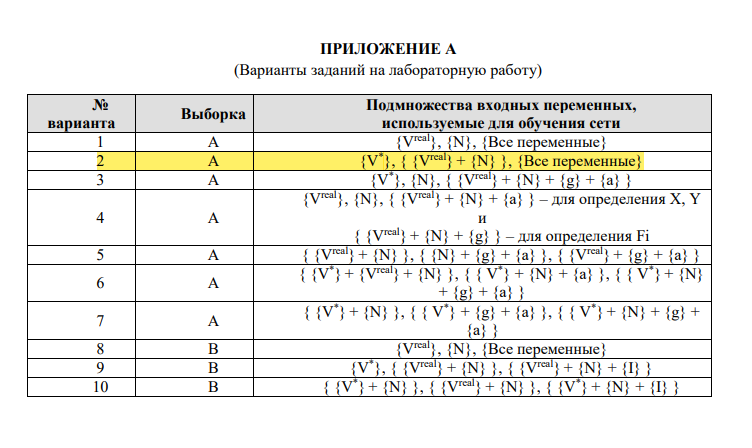

#Импорт библиотеки и данных

In [96]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [97]:
path_to_dataset = "/content/drive/MyDrive/Colab/datasetA.xlsx"
data = pd.read_excel(path_to_dataset)
print(data.shape)
data.head(5)

(32, 21)


,V1,V2,V3,N1,N2,N3,V1real,V2real,V3real,I1,...,I3,ax,ay,az,gx,gy,gz,X,Y,Fi
0,250,250,250,30348,30269,30298,208.86,220.49,220.28,0.21,...,0.22,157.51,132.00,-244.28,-0.61,-0.92,24.97,2,2,104
1,-250,250,250,-28680,29161,29105,-211.35,219.66,221.80,0.33,...,0.25,96.25,1.44,29.15,-0.28,-0.05,8.56,206,-212,33
2,250,-250,250,28128,-28955,29274,222.04,-221.11,221.51,0.25,...,0.26,133.69,-11.01,-0.02,-0.04,0.33,8.33,93,288,34
3,-250,-250,250,-29217,-29160,28612,-226.24,-220.44,217.92,0.24,...,0.29,15.94,17.35,-159.57,0.12,-0.72,-8.39,209,223,-33
4,250,250,-250,28835,29228,-28481,223.30,224.23,-209.88,0.25,...,0.31,107.04,46.78,-177.73,-0.21,-0.08,8.30,-293,-74,33


In [98]:
data.columns

Index(['V1', 'V2', 'V3', 'N1', 'N2', 'N3', 'V1real', 'V2real', 'V3real', 'I1',
       'I2', 'I3', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'X', 'Y', 'Fi'],
      dtype='object')

# Получение 3 подмножеств для выборки

In [99]:
dataset1 = data[["V1","V2","V3"]]
dataset2 = data[["N1","N2","N3","V1real","V2real","V3real"]]
dataset3 = data.drop(["X","Y","Fi"],axis=1)

In [100]:
# Подмножество входных переменных 1
dataset1.head(3)

,V1,V2,V3
0,250,250,250
1,-250,250,250
2,250,-250,250


In [101]:
# Подмножество входных переменных 2
dataset2.head(3)

,N1,N2,N3,V1real,V2real,V3real
0,30348,30269,30298,208.86,220.49,220.28
1,-28680,29161,29105,-211.35,219.66,221.80
2,28128,-28955,29274,222.04,-221.11,221.51


In [102]:
# Подмножество входных переменных 3
dataset3.head(3)

,V1,V2,V3,N1,N2,N3,V1real,V2real,V3real,I1,I2,I3,ax,ay,az,gx,gy,gz
0,250,250,250,30348,30269,30298,208.86,220.49,220.28,0.21,0.21,0.22,157.51,132.00,-244.28,-0.61,-0.92,24.97
1,-250,250,250,-28680,29161,29105,-211.35,219.66,221.80,0.33,0.24,0.25,96.25,1.44,29.15,-0.28,-0.05,8.56
2,250,-250,250,28128,-28955,29274,222.04,-221.11,221.51,0.25,0.27,0.26,133.69,-11.01,-0.02,-0.04,0.33,8.33


In [103]:
# Выходные переменные
output = data[["X","Y","Fi"]]
output.head(10)

,X,Y,Fi
0,2,2,104
1,206,-212,33
2,93,288,34
3,209,223,-33
4,-293,-74,33
5,87,-291,-33
6,-278,63,-33
7,0,-1,-98
8,4,4,-199
9,256,-379,51


In [104]:
dataset1 = dataset1.values
dataset2 = dataset2.values
dataset3 = dataset3.values
output = output.values

# Создание функции для обучения нейронных сетей с разными гиперпараметрами

In [105]:
def train(input,output,hidden_layer_sizes=(10,10,10),activation='tanh',max_iter = 5000,solver='lbfgs',random_state = 0):
  import numpy as np
  from sklearn.neural_network import MLPRegressor
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error
  np.random.seed(random_state)
  # Scale output and input to range [0,1]
  inputScaler = MinMaxScaler()
  outputScaler = MinMaxScaler()
  inputScaler.fit(input)
  outputScaler.fit(output)
  scaled_input = inputScaler.transform(input)
  scaled_output = outputScaler.transform(output)
  # Create and train neural network 
  ANNRegressor = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,activation=activation,solver=solver,max_iter=max_iter)
  ANNRegressor.fit(scaled_input,scaled_output)
  # Make output prediction
  scaled_output_pred = ANNRegressor.predict(scaled_input)
  output_pred = outputScaler.inverse_transform(scaled_output_pred)
  # Calculate MSE and maximum error
  mse_x = mean_squared_error(output[:,0],output_pred[:,0])
  mse_y = mean_squared_error(output[:,1],output_pred[:,1])
  mse_phi = mean_squared_error(output[:,2],output_pred[:,2])
  rmse_x = np.sqrt(mse_x)
  rmse_y = np.sqrt(mse_y)
  rmse_phi = np.sqrt(mse_phi)
  abs_error = np.abs(output_pred-output)
  maximum_error = np.max(abs_error,axis=0)
  return np.round(output_pred,2), np.round(rmse_x,2), np.round(rmse_y,2), np.round(rmse_phi,2), np.round(maximum_error,2)

# Исследование значения RMSE,максимальной ошибки от метода оптимизации solver

In [106]:
# SGD Optimizer
output_pred_sgd, mse_x_sgd, mse_y_sgd, mse_phi_sgd, maximum_error_sgd = train(dataset3,output,solver="sgd")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_sgd,mse_y_sgd,mse_phi_sgd))
print("Maximum error = {}".format(np.round(maximum_error_sgd,2)))

RMSE X = 188.53 , Y = 245.60 , Phi = 97.88
Maximum error = [446.11 456.81 255.88]


In [107]:
# Adam Optimizer
output_pred_adam, mse_x_adam, mse_y_adam, mse_phi_adam, maximum_error_adam = train(dataset3,output,solver="adam")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_adam,mse_y_adam,mse_phi_adam))
print("Maximum error = {}".format(np.round(maximum_error_adam,2)))

RMSE X = 104.03 , Y = 122.56 , Phi = 87.68
Maximum error = [272.75 247.81 282.84]


In [108]:
# LBFGS Optimizer
output_pred_lbfgs, mse_x_lbfgs, mse_y_lbfgs, mse_phi_lbfgs, maximum_error_lbfgs= train(dataset3,output,solver="lbfgs")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_lbfgs,mse_y_lbfgs,mse_phi_lbfgs))
print("Maximum error = {}".format(np.round(maximum_error_lbfgs,2)))

RMSE X = 2.78 , Y = 2.01 , Phi = 0.69
Maximum error = [7.03 4.84 1.33]


Result : LBFGS > Adam > SGD

# Функция для построения графика зависимости значения ошибки от гиперпараметр 

In [109]:
def plot_error(msex1,msey1,msephi1,maxx1,maxy1,maxphi1,msex2,msey2,msephi2,maxx2,maxy2,maxphi2,msex3,msey3,msephi3,maxx3,maxy3,maxphi3,labels=["1","2","3"]):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(20,10))
  # MSE X,Y,Phi
  plt.subplot(2, 3, 1)
  plt.scatter(y=[1],x=[msex1],label=labels[0])
  plt.scatter(y=[1],x=[msex2],label=labels[1])
  plt.scatter(y=[1],x=[msex3],label=labels[2])
  plt.title('RMSE X')
  plt.legend()

  plt.subplot(2, 3, 2)
  plt.scatter(y=[1],x=[msey1],label=labels[0])
  plt.scatter(y=[1],x=[msey2],label=labels[1])
  plt.scatter(y=[1],x=[msey3],label=labels[2])
  plt.title('RMSE Y')
  plt.legend()

  plt.subplot(2, 3, 3)
  plt.scatter(y=[1],x=[msephi1],label=labels[0])
  plt.scatter(y=[1],x=[msephi2],label=labels[1])
  plt.scatter(y=[1],x=[msephi3],label=labels[2])
  plt.title('RMSE Phi')
  plt.legend()

  # Max X,Y,Phi
  plt.subplot(2, 3, 4)
  plt.scatter(y=[1],x=maxx1,label=labels[0])
  plt.scatter(y=[1],x=maxx2,label=labels[1])
  plt.scatter(y=[1],x=maxx3,label=labels[2])
  plt.title('Maximum error of X')
  plt.legend()

  plt.subplot(2, 3, 5)
  plt.scatter(y=[1],x=maxy1,label=labels[0])
  plt.scatter(y=[1],x=maxy2,label=labels[1])
  plt.scatter(y=[1],x=maxy3,label=labels[2])
  plt.title('Maximum error of Y')
  plt.legend()

  plt.subplot(2, 3, 6)
  plt.scatter(y=[1],x=maxphi1,label=labels[0])
  plt.scatter(y=[1],x=maxphi2,label=labels[1])
  plt.scatter(y=[1],x=maxphi3,label=labels[2])
  plt.title('Maximum error of Phi')
  plt.legend()

  plt.show()

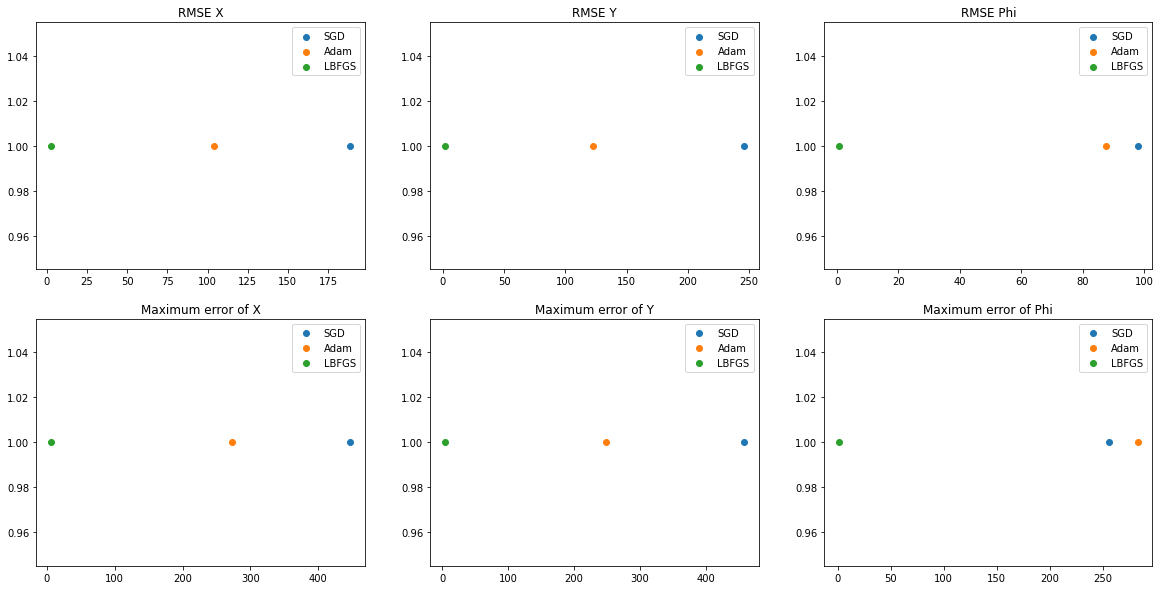

In [110]:
plot_error(mse_x_sgd, mse_y_sgd, mse_phi_sgd, maximum_error_sgd[0],maximum_error_sgd[1],maximum_error_sgd[2],
           mse_x_adam, mse_y_adam, mse_phi_adam, maximum_error_adam[0],maximum_error_adam[1],maximum_error_adam[2],
           mse_x_lbfgs, mse_y_lbfgs, mse_phi_lbfgs, maximum_error_lbfgs[0],maximum_error_lbfgs[1],maximum_error_lbfgs[2],
           labels = ["SGD","Adam","LBFGS"]
           )

# Исследование значения RMSE,максимальной ошибки от функции активации : Tanh, ReLu, Sigmoid

In [111]:
# Tanh activation
output_pred_tanh, mse_x_tanh, mse_y_tanh, mse_phi_tanh, maximum_error_tanh= train(dataset3,output,activation="tanh")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_tanh,mse_y_tanh,mse_phi_tanh))
print("Maximum error = {}".format(np.round(maximum_error_tanh,2)))

RMSE X = 2.78 , Y = 2.01 , Phi = 0.69
Maximum error = [7.03 4.84 1.33]


In [112]:
# Relu activation
output_pred_relu, mse_x_relu, mse_y_relu, mse_phi_relu, maximum_error_relu = train(dataset3,output,activation="relu")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_relu,mse_y_relu,mse_phi_relu))
print("Maximum error = {}".format(np.round(maximum_error_relu,2)))

RMSE X = 5.89 , Y = 2.95 , Phi = 2.15
Maximum error = [17.2   7.57  8.76]


In [113]:
# Sigmoid activation
output_pred_sigmoid, mse_x_sigmoid, mse_y_sigmoid, mse_phi_sigmoid, maximum_error_sigmoid = train(dataset3,output,activation="logistic")
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_sigmoid,mse_y_sigmoid,mse_phi_sigmoid))
print("Maximum error = {}".format(np.round(maximum_error_sigmoid,2)))

RMSE X = 11.02 , Y = 7.85 , Phi = 2.92
Maximum error = [26.47 15.02 10.22]


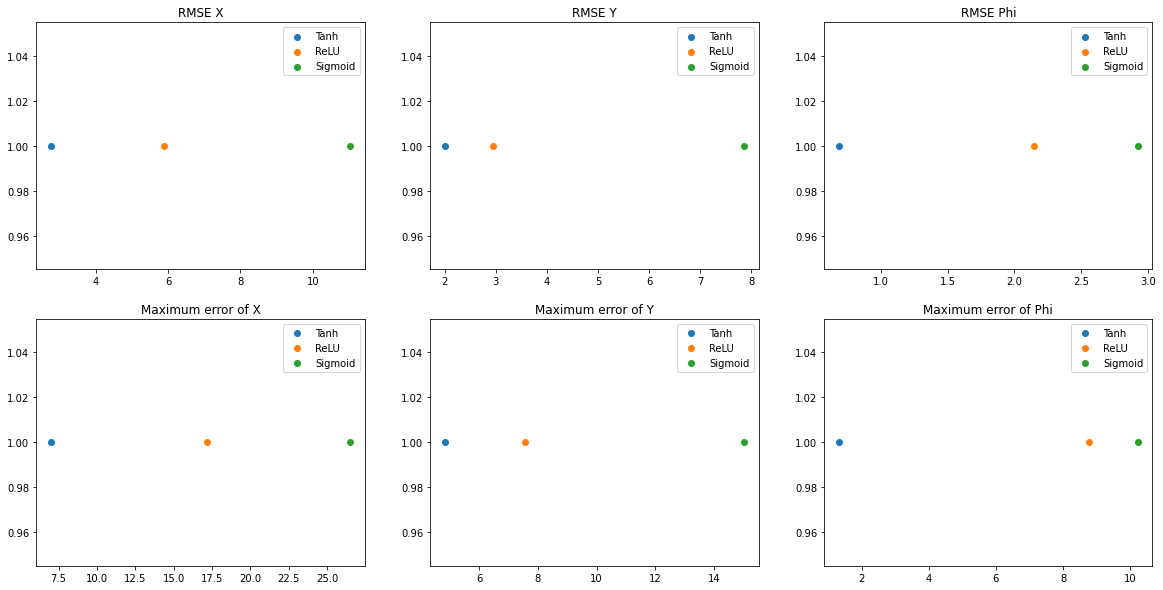

In [114]:
plot_error(mse_x_tanh, mse_y_tanh, mse_phi_tanh, maximum_error_tanh[0],maximum_error_tanh[1],maximum_error_tanh[2],
           mse_x_relu, mse_y_relu, mse_phi_relu, maximum_error_relu[0],maximum_error_relu[1],maximum_error_relu[2],
           mse_x_sigmoid, mse_y_sigmoid, mse_phi_sigmoid, maximum_error_sigmoid[0],maximum_error_sigmoid[1],maximum_error_sigmoid[2],
           labels = ["Tanh","ReLU","Sigmoid"]
           )

Result : Tanh > ReLu > Sigmoid

# Исследование значения RMSE,максимальной ошибки от числа итераций

In [115]:
# 500 iterations
output_pred_1000, mse_x_1000, mse_y_1000, mse_phi_1000, maximum_error_1000 = train(dataset3,output,max_iter=1000)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_1000,mse_y_1000,mse_phi_1000))
print("Maximum error = {}".format(np.round(maximum_error_1000,2)))

RMSE X = 2.78 , Y = 2.01 , Phi = 0.69
Maximum error = [7.03 4.84 1.33]


In [116]:
# 200 iterations
output_pred_200, mse_x_200, mse_y_200, mse_phi_200, maximum_error_200 = train(dataset3,output,max_iter=200)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_200,mse_y_200,mse_phi_200))
print("Maximum error = {}".format(np.round(maximum_error_200,2)))

RMSE X = 16.02 , Y = 11.97 , Phi = 3.21
Maximum error = [37.92 31.14  7.44]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [117]:
# 50 iterations
output_pred_50, mse_x_50, mse_y_50, mse_phi_50, maximum_error_50 = train(dataset3,output,max_iter=50)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_50,mse_y_50,mse_phi_50))
print("Maximum error = {}".format(np.round(maximum_error_50,2)))

RMSE X = 47.94 , Y = 42.42 , Phi = 49.01
Maximum error = [118.79  90.93 199.14]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


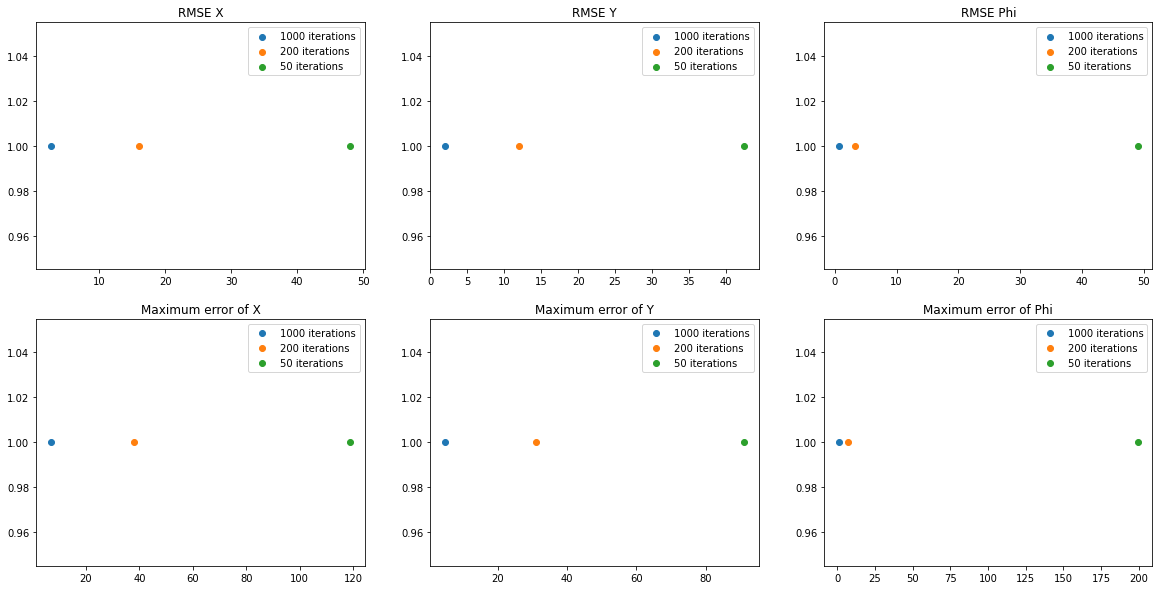

In [118]:
plot_error( mse_x_1000, mse_y_1000, mse_phi_1000, maximum_error_1000[0],maximum_error_1000[1],maximum_error_1000[2],
           mse_x_200, mse_y_200, mse_phi_200, maximum_error_200[0],maximum_error_200[1],maximum_error_200[2],
           mse_x_50, mse_y_50, mse_phi_50, maximum_error_50[0],maximum_error_50[1],maximum_error_50[2],
           labels = ["1000 iterations","200 iterations","50 iterations"]
           )

Result : 500 iterations > 200 iterations > 50 iterations


# Исследование значения RMSE,максимальной ошибки от число нейронов в одном слое

In [119]:
# 10 neurons * 3 layers
output_pred_10_3, mse_x_10_3, mse_y_10_3, mse_phi_10_3, maximum_error_10_3 = train(dataset3,output,hidden_layer_sizes=(10,10,10))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_10_3,mse_y_10_3,mse_phi_10_3))
print("Maximum error = {}".format(np.round(maximum_error_10_3,2)))

RMSE X = 2.78 , Y = 2.01 , Phi = 0.69
Maximum error = [7.03 4.84 1.33]


In [120]:
# 6 neurons * 3 layers
output_pred_6_3, mse_x_6_3, mse_y_6_3, mse_phi_6_3, maximum_error_6_3 = train(dataset3,output,hidden_layer_sizes=(6,6,6))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_6_3,mse_y_6_3,mse_phi_6_3))
print("Maximum error = {}".format(np.round(maximum_error_6_3,2)))

RMSE X = 8.08 , Y = 5.10 , Phi = 1.56
Maximum error = [29.18 14.92  3.89]


In [121]:
# 4 neurons * 3 layers
output_pred_4_3, mse_x_4_3, mse_y_4_3, mse_phi_4_3, maximum_error_4_3 = train(dataset3,output,hidden_layer_sizes=(4,4,4))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_4_3,mse_y_4_3,mse_phi_4_3))
print("Maximum error = {}".format(np.round(maximum_error_4_3,2)))

RMSE X = 13.30 , Y = 18.36 , Phi = 2.32
Maximum error = [36.27 65.2   8.92]


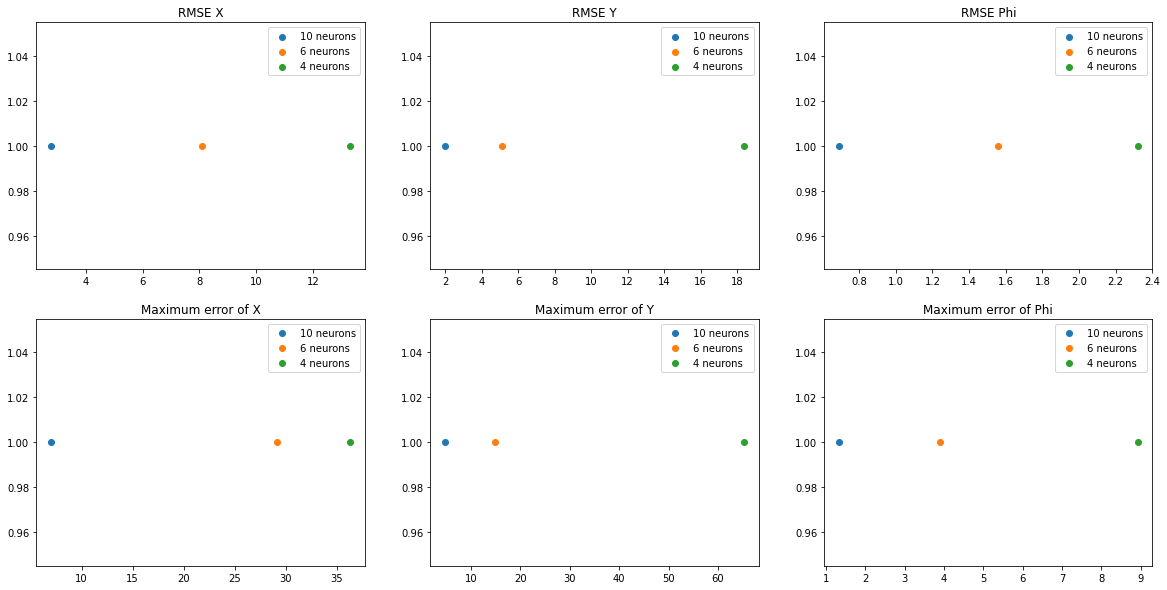

In [122]:
plot_error( mse_x_10_3, mse_y_10_3, mse_phi_10_3, maximum_error_10_3[0],maximum_error_10_3[1],maximum_error_10_3[2],
           mse_x_6_3, mse_y_6_3, mse_phi_6_3, maximum_error_6_3[0],maximum_error_6_3[1],maximum_error_6_3[2],
           mse_x_4_3, mse_y_4_3, mse_phi_4_3, maximum_error_4_3[0],maximum_error_4_3[1],maximum_error_4_3[2],
           labels = ["10 neurons","6 neurons","4 neurons"]
           )

Result :10 neurons > 6 neurons > 4 neurons

# Исследование значения RMSE,максимальной ошибки от число слоев 

In [123]:
# 4 neurons * 6 layers
output_pred_4_6, mse_x_4_6, mse_y_4_6, mse_phi_4_6, maximum_error_4_6 = train(dataset3,output,hidden_layer_sizes=(4,4,4,4,4,4))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_4_6,mse_y_4_6,mse_phi_4_6))
print("Maximum error = {}".format(np.round(maximum_error_4_6,2)))

RMSE X = 15.63 , Y = 40.21 , Phi = 14.10
Maximum error = [ 43.96 101.52  35.78]


In [124]:
# 4 neurons * 4 layers
output_pred_4_4, mse_x_4_4, mse_y_4_4, mse_phi_4_4, maximum_error_4_4 = train(dataset3,output,hidden_layer_sizes=(4,4,4,4))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_4_4,mse_y_4_4,mse_phi_4_4))
print("Maximum error = {}".format(np.round(maximum_error_4_4,2)))

RMSE X = 17.41 , Y = 15.32 , Phi = 2.90
Maximum error = [46.39 43.93  7.31]


In [125]:
# 4 neurons * 10 layers
output_pred_4_10, mse_x_4_10, mse_y_4_10, mse_phi_4_10, maximum_error_4_10 = train(dataset3,output,hidden_layer_sizes=(4,4,4,4,4,4,4,4,4,4))
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_4_10,mse_y_4_10,mse_phi_4_10))
print("Maximum error = {}".format(np.round(maximum_error_4_10,2)))

RMSE X = 90.02 , Y = 94.89 , Phi = 38.34
Maximum error = [191.35 273.35 150.92]


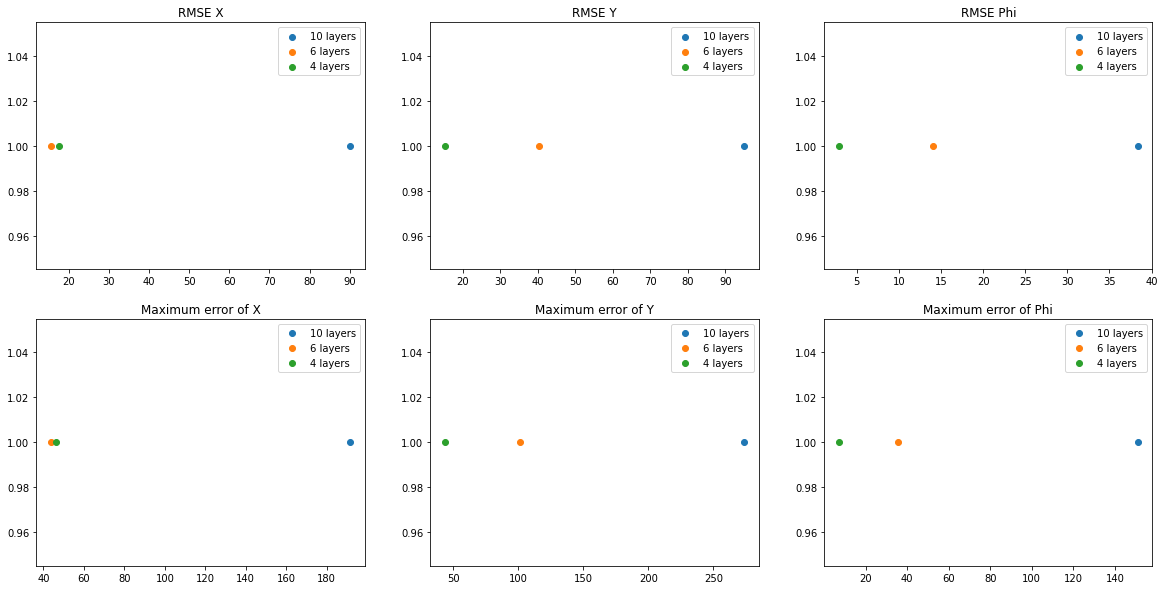

In [126]:
plot_error( mse_x_4_10, mse_y_4_10, mse_phi_4_10, maximum_error_4_10[0],maximum_error_4_10[1],maximum_error_4_10[2],
           mse_x_4_6, mse_y_4_6, mse_phi_4_6, maximum_error_4_6[0],maximum_error_4_6[1],maximum_error_4_6[2],
           mse_x_4_4, mse_y_4_4, mse_phi_4_4, maximum_error_4_4[0],maximum_error_4_4[1],maximum_error_4_4[2],
           labels = ["10 layers","6 layers","4 layers"]
           )

Result :10 layers > 6 layers > 4 layers

# Исследование значения RMSE,максимальной ошибки от выборки данных

In [127]:
# V1,V2,V3
output_pred_data1, mse_x_data1, mse_y_data1, mse_phi_data1, maximum_error_data1 = train(dataset1,output)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_data1,mse_y_data1,mse_phi_data1))
print("Maximum error = {}".format(np.round(maximum_error_data1,2)))

RMSE X = 3.76 , Y = 6.00 , Phi = 3.07
Maximum error = [ 8.8  18.33  7.47]


In [128]:
# Vreal + N
output_pred_data2, mse_x_data2, mse_y_data2, mse_phi_data2, maximum_error_data2 = train(dataset2,output)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_data2,mse_y_data2,mse_phi_data2))
print("Maximum error = {}".format(np.round(maximum_error_data2,2)))

RMSE X = 4.72 , Y = 3.51 , Phi = 2.68
Maximum error = [12.41  8.08  5.83]


In [129]:
# All features
output_pred_data3, mse_x_data3, mse_y_data3, mse_phi_data3, maximum_error_data3 = train(dataset3,output)
print("RMSE X = {:.2f} , Y = {:.2f} , Phi = {:.2f}".format(mse_x_data3,mse_y_data3,mse_phi_data3))
print("Maximum error = {}".format(np.round(maximum_error_data3,2)))

RMSE X = 2.78 , Y = 2.01 , Phi = 0.69
Maximum error = [7.03 4.84 1.33]


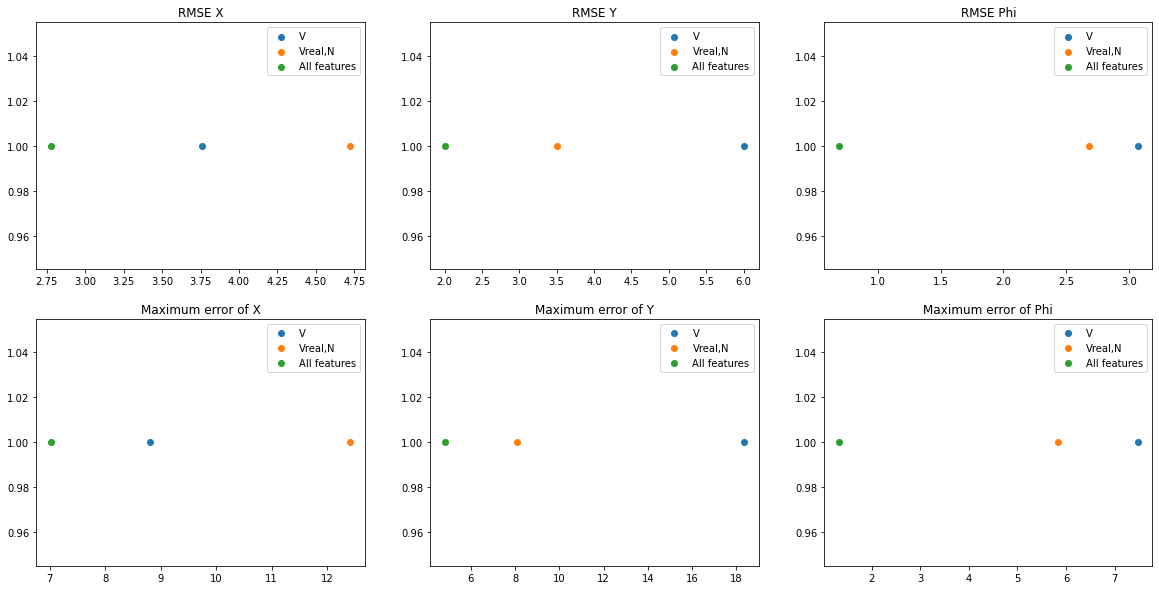

In [130]:
plot_error( mse_x_data1, mse_y_data1, mse_phi_data1, maximum_error_data1[0],maximum_error_data1[1],maximum_error_data1[2],
           mse_x_data2, mse_y_data2, mse_phi_data2, maximum_error_data2[0],maximum_error_data2[1],maximum_error_data2[2],
           mse_x_data3, mse_y_data3, mse_phi_data3, maximum_error_data3[0],maximum_error_data3[1],maximum_error_data3[2],
           labels = ["V","Vreal,N","All features"]
           )

Result : All inputs >  Vreal+N > V1,V2,V3

# Подбор емкости НС для получения найлучшего результата

In [ ]:
no_max_layers = 10
no_max_neurons = 30
rmse_array = np.zeros((no_max_layers,no_max_neurons))
for i in range(1,no_max_layers+1):
  for j in range(1,no_max_neurons+1):
    print("{} layers , {} neurons per layer".format(i,j))
    hidden_layer_sizes = tuple(np.full((i),j))
    output_pred = train(dataset3,output,hidden_layer_sizes=hidden_layer_sizes)[0]
    outputScaler = MinMaxScaler()
    outputScaler.fit(output)
    scaled_output = outputScaler.transform(output)
    scaled_output_pred = outputScaler.transform(output_pred)
    mse_xyphi = mean_squared_error(scaled_output,scaled_output_pred)
    rmse_array[i-1,j-1] = np.sqrt(mse_xyphi)
    print('Done')

In [79]:
rmse_array.shape

(10, 30)

In [80]:
df = pd.DataFrame(rmse_array)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.198471,0.138161,0.077606,0.044984,0.028112,0.031968,0.008456,0.005325,0.003215,0.004959,...,0.002520,0.002483,0.002659,0.002896,0.002603,0.002881,0.002966,0.002839,0.002685,0.003237
1,0.198067,0.135012,0.048404,0.025343,0.013566,0.006815,0.010500,0.003238,0.003456,0.003963,...,0.003484,0.003631,0.003342,0.002754,0.002383,0.002557,0.003616,0.002292,0.002174,0.002731
2,0.198011,0.134512,0.052961,0.015812,0.008087,0.007112,0.005713,0.002823,0.003192,0.002608,...,0.004021,0.005974,0.003354,0.004400,0.004208,0.003567,0.003278,0.002580,0.003046,0.003133
3,0.197992,0.141964,0.066336,0.016680,0.005565,0.003619,0.003682,0.002686,0.002497,0.003305,...,0.003347,0.003108,0.002797,0.003150,0.003741,0.003664,0.002637,0.003333,0.003306,0.003165
4,0.253511,0.152594,0.039866,0.010386,0.021196,0.004986,0.004632,0.003205,0.003436,0.003013,...,0.003981,0.004053,0.002802,0.003969,0.004423,0.002684,0.002478,0.004188,0.003532,0.002898
5,0.253525,0.195979,0.053491,0.035340,0.002964,0.003812,0.003828,0.003725,0.005462,0.004569,...,0.004717,0.003801,0.003399,0.004310,0.002935,0.003492,0.003522,0.003315,0.004171,0.003790
6,0.253505,0.144280,0.087056,0.025882,0.008164,0.005564,0.002933,0.003565,0.004777,0.003171,...,0.004938,0.005492,0.003936,0.003749,0.002569,0.004006,0.004129,0.003787,0.005412,0.003068
7,0.253496,0.149656,0.171115,0.036773,0.026874,0.019684,0.003013,0.002757,0.002556,0.004301,...,0.003209,0.004343,0.004053,0.004535,0.003306,0.002979,0.003750,0.004531,0.005377,0.005942
8,0.253497,0.150782,0.047794,0.024140,0.005504,0.024695,0.005477,0.002773,0.002877,0.002860,...,0.004377,0.003614,0.003519,0.004184,0.001811,0.004409,0.004117,0.002501,0.005001,0.004036
9,0.253497,0.195614,0.042768,0.106074,0.011456,0.005962,0.016450,0.004754,0.002987,0.002609,...,0.003425,0.003536,0.003657,0.003559,0.004320,0.003482,0.005553,0.003062,0.004495,0.004972


In [92]:
arg_min = np.argmin(rmse_array)
best_no_layer = arg_min//30 + 1
best_no_neuron = arg_min%30 + 1
print('Number of layers for best result of RMSE :',best_no_layer)
print('Number of neurons per layer for best result of RMSE :',best_no_neuron)

Number of layers for best result of RMSE : 9
Number of neurons per layer for best result of RMSE : 25


# Графика зависимости RMSE от количества слоев и нейронов в одном слое

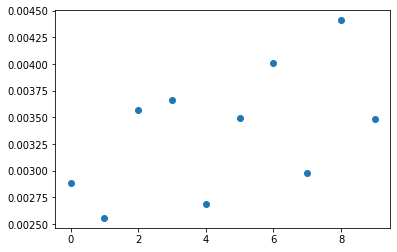

In [93]:
plt.scatter(range(no_max_layers),rmse_array[:,25])

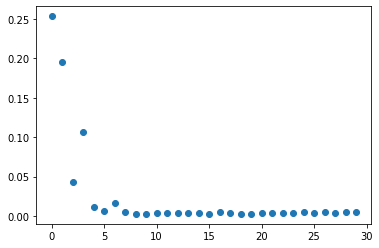

In [94]:
plt.scatter(range(no_max_neurons),rmse_array[9,:])